In [1]:
import numpy as np
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
      self.b = None
      self._alpha = alpha
      self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
      return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
      b = start_b.copy()
      for i in range(n_iters):
          b_grad = self.grad_func(X, y, b)
          b = self.gradient_step(b, b_grad)
      return b
    def fit(self, X, y):
      m = X.shape[1]
      start_b = np.ones(m)
      self.b = self.optimize(X, y, start_b, self._n_iters)
class LogReg(SGD):
    def sigmoid(self, X, b):
      return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
      n = X.shape[0]
      grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
      return grad
    def predict_proba(self, X):
      return self.sigmoid(X, self.b)
    def predict(self, X):
      y_pred = self.predict_proba(X) > 0.5
      return y_pred

Выведите результаты работы библиотечной модели - в численном и в графическом виде.

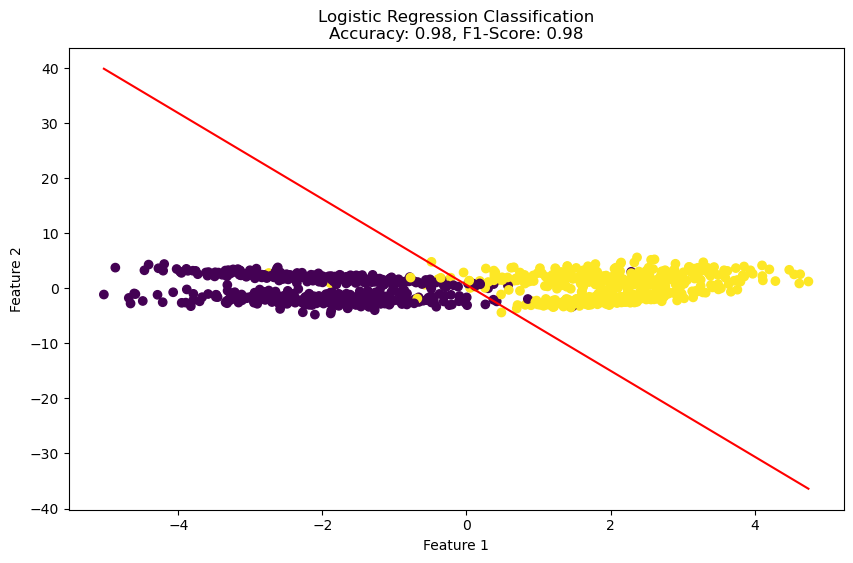

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)

slope = -(model.coef_[0][0] / model.coef_[0][1])
intercept = -(model.intercept_ / model.coef_[0][1])
x_values = np.linspace(X[:, 0].min(), X[:, 0].max())
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Logistic Regression Classification\nAccuracy: {accuracy:.2f}, F1-Score: {f1:.2f}')
plt.show()


Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [3]:
model = LogReg(alpha=90, n_iters=1000)
print(model.fit(X, y))
print('Модель расходится при alpha = 90')

None
Модель расходится при alpha = 90


C:\Users\Алексей\AppData\Local\Temp\ipykernel_21552\3897428614.py:21: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [4]:
class LogRegModified(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        return self.sigmoid(X_with_bias, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred.astype(int)

    def fit(self, X, y):
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        m = X_with_bias.shape[1]
        start_b = np.zeros(m)
        self.b = self.optimize(X_with_bias, y, start_b, self._n_iters)

Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

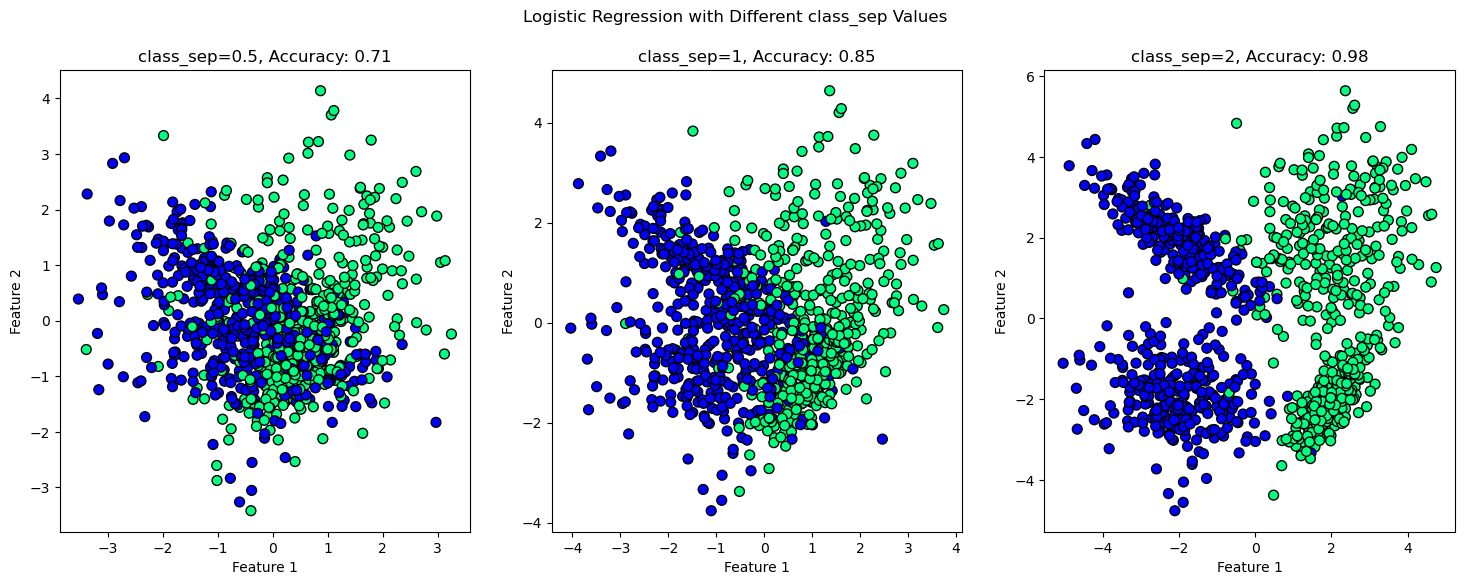

In [5]:
class_seps = [0.5, 1, 2]
accuracies = []

plt.figure(figsize=(18, 6))

for i, class_sep in enumerate(class_seps):
    X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=class_sep,
                          random_state=1)

    model = LogRegModified(alpha=0.5, n_iters=1000)
    model.fit(X, y)

    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    accuracies.append(accuracy)

    plt.subplot(1, len(class_seps), i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolor='k', s=50)
    plt.title(f'class_sep={class_sep}, Accuracy: {accuracy:.2f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.suptitle('Logistic Regression with Different class_sep Values')
plt.show()



при увеличении параметра class_sep данные становятся более различимыми и точность классификации увеличивается

Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [6]:
X_large,y_large= make_classification (n_samples=1000,
                          n_features=20,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=1,
                          random_state=1)

model_large = LogRegModified(alpha=0.5, n_iters=1000)
model_large.fit(X_large, y_large)

y_pred_large = model_large.predict(X_large)
accuracy_large = accuracy_score(y_large, y_pred_large)

accuracy_large


0.853

Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [7]:
from sklearn.multiclass import OneVsRestClassifier

X_multi,y_multi= make_classification (n_samples=1000,
                          n_features=10,
                          n_informative=5,
                          n_redundant=0,
                          n_classes=3,
                          class_sep=1,
                          random_state=1)

ovr_classifier = OneVsRestClassifier(LogisticRegression())
ovr_classifier.fit(X_multi, y_multi)

y_pred_multi = ovr_classifier.predict(X_multi)
accuracy_multi = accuracy_score(y_multi, y_pred_multi)

accuracy_multi

0.695

Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [8]:
probabilities = ovr_classifier.predict_proba(X_multi)
probabilities

array([[0.13372291, 0.8562182 , 0.01005889],
       [0.32310179, 0.44334543, 0.23355278],
       [0.05452884, 0.33266643, 0.61280473],
       ...,
       [0.03113208, 0.16735826, 0.80150966],
       [0.32440811, 0.40183442, 0.27375746],
       [0.03430274, 0.32997149, 0.63572577]])